In [1]:
#importing libraries
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense,GlobalAveragePooling2D,Conv2D
from keras.layers import Input
from keras.applications import MobileNetV2
from keras.applications import MobileNet
from keras.preprocessing import image
#from keras.applications.mobilenet_v2 import preprocess_input
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
np.random.seed(20)

Using TensorFlow backend.


In [2]:
#importing dataset using Kaggle API 
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c modified-mnist
!cat /var/log/colab-jupyter.log

Saving kaggle.json to kaggle.json
100% 977M/980M [00:10<00:00, 104MB/s] 
100% 980M/980M [00:10<00:00, 96.3MB/s]
 97% 191M/196M [00:02<00:00, 63.3MB/s]
100% 196M/196M [00:02<00:00, 80.0MB/s]
  0% 0.00/575k [00:00<?, ?B/s]
100% 575k/575k [00:00<00:00, 80.1MB/s]
{"name":"app","hostname":"33c2806415fc","pid":10,"type":"jupyter","level":40,"msg":"/usr/local/lib/python2.7/dist-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.","time":"2019-11-14T00:02:31.187Z","v":0}
{"name":"app","hostname":"33c2806415fc","pid":10,"type":"jupyter","level":40,"msg":"  warn(\"IPython.utils.traitlets has moved to a top-level traitlets package.\")","time":"2019-11-14T00:02:31.188Z","v":0}
{"name":"app","hostname":"33c2806415fc","pid":10,"type":"jupyter","level":30,"msg":"Writing notebook server cookie secret to /root/.local/share/jupyter/runtime/notebook_cookie_secret","time":"2019-11-14T00:02:32.151Z","v":0}
{"name":"app","hostname":"33c2806

In [0]:
train_images = pd.read_pickle('train_max_x.zip' , 'zip')
#train_images = np.stack((train_images,)*3, axis=-1)
train_images = preprocess_input(train_images)




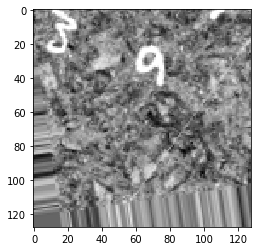

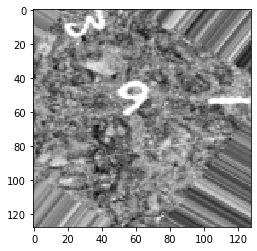

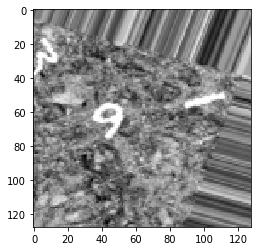

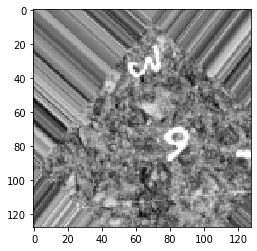

In [0]:
#Image Augmentation
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=False,
fill_mode='nearest') 

x = train_images[3]
plt.imshow(x , cmap='gray')
x = np.expand_dims(x, axis=-1)
x= np.expand_dims(x, axis=0)
#x = x.reshape((1,) + x.shape) 
i = 0
for batch in datagen.flow(x, batch_size=32):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]), cmap='gray')
    i += 1
    if i % 4 == 0:
        break
plt.show()



In [0]:
test_images = pd.read_pickle('test_max_x.zip' , 'zip')
#test_images = np.stack((test_images,)*3, axis=-1)
x_test = preprocess_input(test_images)



In [0]:

train=pd.read_csv("train_max_y.csv")
train.head()

y = np.array(train.drop(['Id'],axis=1))
y = to_categorical(y)

X_train, X_val, y_train, y_val = train_test_split(train_images, y, random_state=42, test_size=0.2)

In [7]:
#base_model=MobileNetV2
#img_input = Input(shape=(128, 128, 1), name = 'grayscale_input_layer')
#x = Conv2D(3, (3,3),  padding= 'same', name = 'grayscale_RGB_layer')(img_input)

input_shape = (128, 128, 1)
img_input = Input(shape=input_shape, name = 'grayscale_input_layer')
y = Conv2D(3, (3,3),  padding= 'same', name = 'grayscale_RGB_layer')(img_input)
base_model=MobileNet(weights='imagenet',include_top=False)(y)#imports the mobilenet model and discards the last 1000 neuron layer.
x=GlobalAveragePooling2D()(base_model)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(10,activation='softmax')(x) #final layer with softmax activation
model=Model(inputs=img_input,outputs=preds)
model.summary()


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
grayscale_input_layer (Input (None, 128, 128, 1)       0         
_________________________________________________________________
grayscale_RGB_layer (Conv2D) (None, 128, 128, 3)       30        
_________________________________________________________________
mobilenet_1.00_224 (Model)   multiple                  3228864   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               5248

In [0]:
output_dim = nb_classes = 10 
batch_size = 32 
nb_epoch =25

X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)

filepath= "_weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch,verbose=1, validation_data=(X_val, y_val),  callbacks=callbacks_list) 





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


ValueError: ignored

In [0]:
# load weights
model.load_weights("_weights-improvement-24-0.96.hdf5") #change this based on the name of best checkpointed model
# Compile model (required to make predictions)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy']) 

# estimate accuracy on whole dataset using loaded weights
score = model.evaluate(X_val, y_val, verbose=0) 
print('Test Loss:', score[0])
print('Test accuracy:', score[1])


OSError: ignored

In [0]:

x_test = np.expand_dims(x_test, axis=-1)
y_pred = model.predict(x_test, batch_size=batch_size, verbose=0)
y_pred = np.argmax(y_pred,axis=1)

rawdata= { 'Label': y_pred }
submission = pd.DataFrame(rawdata, columns = ['Label'])
submission.to_csv('submission.csv', index=True , header=True)

files.download('submission.csv')